In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
central = pd.read_csv('central.csv')
central = central.drop(['Survey Year'], axis = 1)

In [3]:
inner = pd.read_csv('inner.csv')

In [4]:
outer = pd.read_csv('outer.csv')

In [5]:
central = central.rename(columns = {'Survey wave':'Survey Year', 'Survey date':'Survey Date'})
inner = inner.rename(columns = {'Survey wave (year)':'Survey Year',  'Survey date':'Survey Date'})
outer = outer.rename(columns = {'Survey wave (year)':'Survey Year',  'Survey date':'Survey Date'})

central = central[['Location', 'Survey Date', 'Survey Year', 'Total cycles']]
inner = inner[['Location', 'Survey Date', 'Survey Year', 'Total cycles']]
outer = outer[['Location', 'Survey Date', 'Survey Year', 'Total cycles']]

print(central)
print(inner)
print(outer)

                                  Location Survey Date  Survey Year  \
0       Millbank (south of Thorney Street)  24/01/2014         2014   
1       Millbank (south of Thorney Street)  24/01/2014         2014   
2       Millbank (south of Thorney Street)  24/01/2014         2014   
3       Millbank (south of Thorney Street)  24/01/2014         2014   
4       Millbank (south of Thorney Street)  24/01/2014         2014   
...                                    ...         ...          ...   
758158                           Haymarket  21/12/2021         2021   
758159                           Haymarket  21/12/2021         2021   
758160                           Haymarket  21/12/2021         2021   
758161                           Haymarket  21/12/2021         2021   
758162                           Haymarket  21/12/2021         2021   

        Total cycles  
0                  0  
1                 15  
2                 35  
3                 61  
4                 73  
...      

In [6]:
cycling = pd.concat([central, inner, outer])

In [7]:
cycling = cycling.groupby(['Location','Survey Year', 'Survey Date'], as_index=False).sum()

print(cycling)

             Location  Survey Year Survey Date  Total cycles
0          Abbey Road         2015    01/06/15            79
1          Abbey Road         2015    02/06/15            52
2          Abbey Road         2016    18/04/16            84
3          Abbey Road         2016    19/04/16            86
4          Abbey Road         2017    15/06/17           136
...               ...          ...         ...           ...
33038  Zetland Street         2018  26/06/2018            24
33039  Zetland Street         2019  11/06/2019            21
33040  Zetland Street         2019  12/06/2019            15
33041  Zetland Street         2021  11/05/2021            37
33042  Zetland Street         2021  12/05/2021            40

[33043 rows x 4 columns]


In [8]:
cycling = cycling[['Location', 'Survey Year', 'Total cycles']]
cycling = cycling.groupby(['Location','Survey Year'],as_index=False).mean().round()

cycling = cycling[cycling['Survey Year'] != 2019]
cycling = cycling.rename(columns = {'Total cycles':'Average daily cycles'})

print(cycling)

            Location  Survey Year  Average daily cycles
0         Abbey Road         2015                  66.0
1         Abbey Road         2016                  85.0
2         Abbey Road         2017                 112.0
3         Abbey Road         2018                  82.0
5         Abbey Road         2020                 102.0
...              ...          ...                   ...
8039  Zetland Street         2015                  32.0
8040  Zetland Street         2016                  18.0
8041  Zetland Street         2017                  17.0
8042  Zetland Street         2018                  11.0
8044  Zetland Street         2021                  38.0

[6859 rows x 3 columns]


In [9]:
sites = pd.read_csv('sites.csv')

In [10]:
bike_sites = sites[['Functional cycling area', 'Borough', 'Location']]

bike_sites.shape

(2023, 3)

In [11]:
bike_sites = bike_sites.drop_duplicates()
bike_sites.shape

(1817, 3)

In [12]:
parking = pd.read_csv('parking.csv')

print(parking.shape)
parking = parking[parking['Survey Year'] != 2019]
parking

(23758, 18)


,Survey Date,Survey Year,Borough,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other,Capacity
0,16/10/2017,2017,Newham,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.0
1,12/06/2017,2017,Hackney,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0
2,15/08/2017,2017,Lambeth,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8.0
3,15/09/2017,2017,Havering,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6.0
4,25/09/2017,2017,WalthamForest,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23753,29/06/2017,2017,CityofLondon,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
23754,13/07/2017,2017,Hammersmith&Fulham,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0
23755,26/12/2017,2017,Ealing,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0
23756,27/12/2017,2017,Hounslow,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0


In [13]:
parking_date = parking.groupby(['Borough', 'Survey Year', 'Survey Date']).agg('sum').reset_index()

parking_date

,Borough,Survey Year,Survey Date,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other,Capacity
0,Barking&Dagenham,2017,03/11/2017,0,0,0,0,5,0,0,0,0,0,0,0,0,0,30.0
1,Barking&Dagenham,2017,05/11/2017,0,4,0,0,11,0,0,0,0,1,0,0,0,1,78.0
2,Barking&Dagenham,2017,07/11/2017,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4.0
3,Barking&Dagenham,2017,08/11/2017,0,0,0,0,2,0,0,0,0,0,0,0,0,0,16.0
4,Barking&Dagenham,2017,09/10/2017,0,0,0,0,3,0,0,2,0,0,0,0,0,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,Westminster,2017,30/06/2017,0,0,0,0,23,0,0,10,0,0,0,0,0,0,246.0
1234,Westminster,2017,30/08/2017,1,0,0,0,6,0,0,4,0,0,0,0,0,0,32.0
1235,Westminster,2017,31/05/2017,0,0,0,0,2,0,0,0,0,0,0,0,0,0,14.0
1236,Westminster,2017,31/08/2017,0,0,0,0,22,0,0,6,0,0,0,0,0,0,148.0


In [14]:
parking_mean = parking_date.groupby(['Borough', 'Survey Year']).agg('mean').reset_index()

pd.set_option('display.max_rows', None)

parking_mean

,Borough,Survey Year,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other,Capacity
0,Barking&Dagenham,2017,0.000000,0.454545,0.045455,0.136364,9.454545,0.045455,0.000000,0.500000,0.000000,0.090909,0.136364,0.272727,0.000000,0.136364,72.909091
1,Barking&Dagenham,2018,0.000000,0.333333,0.000000,0.000000,2.222222,0.222222,0.000000,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,24.777778
2,Barnet,2018,0.034483,1.275862,0.000000,0.000000,12.482759,0.137931,0.034483,0.034483,0.000000,0.172414,0.241379,0.448276,0.206897,0.379310,86.172414
3,Bexley,2017,0.045455,0.545455,0.000000,0.000000,6.863636,0.000000,0.090909,0.000000,0.000000,0.227273,0.045455,0.000000,0.000000,0.181818,48.363636
4,Bexley,2018,0.000000,0.500000,0.000000,0.000000,1.000000,0.333333,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.833333,19.333333
5,Brent,2018,0.060606,0.696970,0.181818,0.000000,10.272727,0.000000,2.060606,0.636364,0.000000,0.090909,0.060606,0.121212,0.000000,1.575758,88.181818
6,Bromley,2017,0.210526,1.631579,0.000000,0.105263,9.473684,0.263158,0.052632,0.210526,0.000000,0.315789,0.105263,0.684211,0.052632,0.842105,91.894737
7,Bromley,2018,0.076923,1.000000,0.000000,0.000000,4.615385,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,34.076923
8,Camden,2017,0.760870,1.130435,0.326087,0.000000,14.500000,15.565217,0.021739,3.565217,0.043478,0.195652,0.195652,0.391304,0.195652,0.826087,195.500000
9,Camden,2018,0.250000,0.000000,0.000000,0.000000,0.250000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000


In [15]:
parking_mean['Borough'][0] = 'Barking & Dagenham'
parking_mean['Borough'][1] = 'Barking & Dagenham'

parking_mean['Borough'][10] = 'City of London'
parking_mean['Borough'][11] = 'City of London'

parking_mean['Borough'][22] = 'Hammersmith & Fulham'
parking_mean['Borough'][23] = 'Hammersmith & Fulham'

parking_mean['Borough'][34] = 'Kensington & Chelsea'
parking_mean['Borough'][35] = 'Kensington & Chelsea'

parking_mean['Borough'][36] = 'Kingston upon Thames'
parking_mean['Borough'][37] = 'Kingston upon Thames'

parking_mean['Borough'][48] = 'Richmond upon Thames'
parking_mean['Borough'][49] = 'Richmond upon Thames'

parking_mean['Borough'][54] = 'Tower Hamlets'
parking_mean['Borough'][55] = 'Tower Hamlets'

parking_mean['Borough'][56] = 'Waltham Forest'
parking_mean['Borough'][57] = 'Waltham Forest'

parking_mean

C:\Users\jakee\AppData\Local\Temp/ipykernel_50608/363764489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parking_mean['Borough'][0] = 'Barking & Dagenham'
C:\Users\jakee\AppData\Local\Temp/ipykernel_50608/363764489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parking_mean['Borough'][1] = 'Barking & Dagenham'
C:\Users\jakee\AppData\Local\Temp/ipykernel_50608/363764489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  par

,Borough,Survey Year,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other,Capacity
0,Barking & Dagenham,2017,0.000000,0.454545,0.045455,0.136364,9.454545,0.045455,0.000000,0.500000,0.000000,0.090909,0.136364,0.272727,0.000000,0.136364,72.909091
1,Barking & Dagenham,2018,0.000000,0.333333,0.000000,0.000000,2.222222,0.222222,0.000000,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,24.777778
2,Barnet,2018,0.034483,1.275862,0.000000,0.000000,12.482759,0.137931,0.034483,0.034483,0.000000,0.172414,0.241379,0.448276,0.206897,0.379310,86.172414
3,Bexley,2017,0.045455,0.545455,0.000000,0.000000,6.863636,0.000000,0.090909,0.000000,0.000000,0.227273,0.045455,0.000000,0.000000,0.181818,48.363636
4,Bexley,2018,0.000000,0.500000,0.000000,0.000000,1.000000,0.333333,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.833333,19.333333
5,Brent,2018,0.060606,0.696970,0.181818,0.000000,10.272727,0.000000,2.060606,0.636364,0.000000,0.090909,0.060606,0.121212,0.000000,1.575758,88.181818
6,Bromley,2017,0.210526,1.631579,0.000000,0.105263,9.473684,0.263158,0.052632,0.210526,0.000000,0.315789,0.105263,0.684211,0.052632,0.842105,91.894737
7,Bromley,2018,0.076923,1.000000,0.000000,0.000000,4.615385,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,34.076923
8,Camden,2017,0.760870,1.130435,0.326087,0.000000,14.500000,15.565217,0.021739,3.565217,0.043478,0.195652,0.195652,0.391304,0.195652,0.826087,195.500000
9,Camden,2018,0.250000,0.000000,0.000000,0.000000,0.250000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000


In [16]:
bike_sites_cycles_year = pd.merge(bike_sites, cycling, on=['Location'])
bike_sites_cycles_year

,Functional cycling area,Borough,Location,Survey Year,Average daily cycles
0,Outer,Hillingdon,Summerhouse Lane,2015,2.0
1,Outer,Hillingdon,Summerhouse Lane,2016,8.0
2,Outer,Hillingdon,Summerhouse Lane,2017,1.0
3,Outer,Hillingdon,Summerhouse Lane,2018,6.0
4,Outer,Hillingdon,Summerhouse Lane,2021,1.0
5,Outer,Hillingdon,Widewater Lock,2015,42.0
6,Outer,Hillingdon,Widewater Lock,2016,27.0
7,Outer,Hillingdon,Widewater Lock,2017,45.0
8,Outer,Hillingdon,Widewater Lock,2018,33.0
9,Outer,Hillingdon,Widewater Lock,2021,40.0


In [17]:
borough_cycles = bike_sites_cycles_year.groupby(['Functional cycling area', 'Borough', 'Survey Year'], 
                                                as_index=False).mean().round()    

borough_cycles

,Functional cycling area,Borough,Survey Year,Average daily cycles
0,Central,Camden,2014,877.0
1,Central,Camden,2015,467.0
2,Central,Camden,2016,464.0
3,Central,Camden,2017,430.0
4,Central,Camden,2018,463.0
5,Central,Camden,2020,545.0
6,Central,Camden,2021,458.0
7,Central,City of London,2014,1002.0
8,Central,City of London,2015,807.0
9,Central,City of London,2016,938.0


In [18]:
cycle_parking_year = pd.merge(parking_mean, borough_cycles, on=['Borough', 'Survey Year'])

cycle_parking_year

,Borough,Survey Year,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other,Capacity,Functional cycling area,Average daily cycles
0,Barking & Dagenham,2017,0.000000,0.454545,0.045455,0.136364,9.454545,0.045455,0.000000,0.500000,0.000000,0.090909,0.136364,0.272727,0.000000,0.136364,72.909091,Outer,66.0
1,Barking & Dagenham,2018,0.000000,0.333333,0.000000,0.000000,2.222222,0.222222,0.000000,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,24.777778,Outer,62.0
2,Barnet,2018,0.034483,1.275862,0.000000,0.000000,12.482759,0.137931,0.034483,0.034483,0.000000,0.172414,0.241379,0.448276,0.206897,0.379310,86.172414,Outer,105.0
3,Bexley,2017,0.045455,0.545455,0.000000,0.000000,6.863636,0.000000,0.090909,0.000000,0.000000,0.227273,0.045455,0.000000,0.000000,0.181818,48.363636,Outer,56.0
4,Bexley,2018,0.000000,0.500000,0.000000,0.000000,1.000000,0.333333,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.833333,19.333333,Outer,55.0
5,Brent,2018,0.060606,0.696970,0.181818,0.000000,10.272727,0.000000,2.060606,0.636364,0.000000,0.090909,0.060606,0.121212,0.000000,1.575758,88.181818,Outer,121.0
6,Bromley,2017,0.210526,1.631579,0.000000,0.105263,9.473684,0.263158,0.052632,0.210526,0.000000,0.315789,0.105263,0.684211,0.052632,0.842105,91.894737,Outer,43.0
7,Bromley,2018,0.076923,1.000000,0.000000,0.000000,4.615385,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,34.076923,Outer,46.0
8,Camden,2017,0.760870,1.130435,0.326087,0.000000,14.500000,15.565217,0.021739,3.565217,0.043478,0.195652,0.195652,0.391304,0.195652,0.826087,195.500000,Central,430.0
9,Camden,2018,0.250000,0.000000,0.000000,0.000000,0.250000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000,Central,463.0


In [19]:
cycle_parking_year.to_csv('parking_merge.csv')

In [20]:
cycle_parking_year = cycle_parking_year.drop(['Survey Year'], axis = 1)

cycle_parking_cor = cycle_parking_year.corr()

cycle_parking_cor

,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other,Capacity,Average daily cycles
Carriageway,1.000000,0.249874,0.457828,0.439616,0.305620,0.072609,0.131327,0.311982,0.055844,0.040814,0.340524,0.978732,0.311866,0.645318,0.551720,0.134799
Covered,0.249874,1.000000,0.490269,0.305591,0.626158,0.081455,0.033262,0.105203,0.199979,0.286340,0.181222,0.319344,0.417449,0.092351,0.640404,-0.178631
Secure,0.457828,0.490269,1.000000,0.437565,0.399231,0.224444,0.151633,0.254867,0.533062,0.028600,0.172667,0.474361,0.141306,0.309106,0.536717,0.126219
Locker,0.439616,0.305591,0.437565,1.000000,0.338408,-0.033641,-0.003821,0.100487,0.141177,0.011813,0.121080,0.472623,0.067676,0.055162,0.430233,0.149425
Sheffield Stand,0.305620,0.626158,0.399231,0.338408,1.000000,0.061841,0.048886,0.331100,0.257707,0.159957,0.185664,0.351617,0.186859,-0.017718,0.853192,0.106832
"""M"" stand",0.072609,0.081455,0.224444,-0.033641,0.061841,1.000000,-0.019716,0.158394,0.156759,0.030342,0.041769,0.004937,0.158249,-0.003375,0.219681,0.110035
"""P"" stand",0.131327,0.033262,0.151633,-0.003821,0.048886,-0.019716,1.000000,0.028770,-0.010686,-0.002153,-0.014506,0.127721,0.017590,0.168578,0.105375,-0.063213
Cyclehoop,0.311982,0.105203,0.254867,0.100487,0.331100,0.158394,0.028770,1.000000,0.325333,0.043692,-0.050007,0.265704,0.046387,-0.020369,0.429935,0.263277
Post,0.055844,0.199979,0.533062,0.141177,0.257707,0.156759,-0.010686,0.325333,1.000000,0.053513,0.049932,0.039118,-0.059271,-0.031859,0.308714,0.224697
Butterfly,0.040814,0.286340,0.028600,0.011813,0.159957,0.030342,-0.002153,0.043692,0.053513,1.000000,0.221457,0.041791,-0.049658,-0.019957,0.147186,0.075776


In [21]:
daily_cycles_cor = round(cycle_parking_cor[['Average daily cycles']],2)
daily_cycles_cor

,Average daily cycles
Carriageway,0.13
Covered,-0.18
Secure,0.13
Locker,0.15
Sheffield Stand,0.11
"""M"" stand",0.11
"""P"" stand",-0.06
Cyclehoop,0.26
Post,0.22
Butterfly,0.08


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.667
Date:                Mon, 10 Oct 2022   Prob (F-statistic):              0.108
Time:                        17:03:44   Log-Likelihood:                -406.15
No. Observations:                  60   AIC:                             816.3
Df Residuals:                      58   BIC:                             820.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    191.6722     45.777      4.187      0.000     100.039     283.306
X              0.6770      0.415      1.633      0.108      -0.153       1.507
==============================================================================
Omnibus:                       39.670   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.957
Skew:                           2.041   Prob(JB):                     9.81e-24
Kurtosis:                       8.072   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

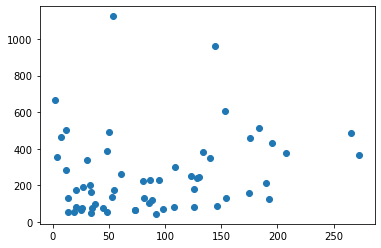

In [22]:
# Independent variable is set as number of tracks.
X = cycle_parking_year["Capacity"]

# Dependent variable is set as Total Cyclists.
y = cycle_parking_year["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = cycle_parking_year).fit()

# Prints the regression table
test.summary()

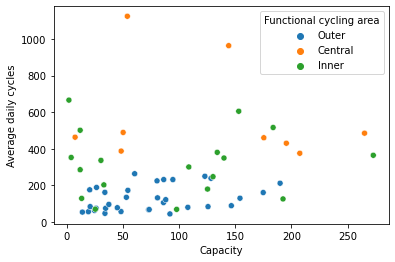

In [23]:
sns.scatterplot(x='Capacity', y='Average daily cycles', data=cycle_parking_year, hue='Functional cycling area')
plt.savefig('AverageCyclistsVsParkingArea.png')

In [24]:
# Extract the estimated parameters.
print("Parameters: ", test.params)
    
# Extract the standard errors.
print("Standard errors: ", test.bse)    

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    191.672186
X              0.677031
dtype: float64
Standard errors:  Intercept    45.777394
X             0.414604
dtype: float64
Predicted values:  [241.03389937 208.44750932 250.01357985 224.41586625 204.76145176
 251.37400887 253.88776982 214.74331876 324.03174258 196.74991851
 289.30005335 228.23185904 264.68320695 209.41039782 296.10421469
 227.64775388 290.88326425 205.81461107 257.93659324 208.93647614
 316.0639974  199.79655792 376.42039973 194.38031009 320.26824684
 276.84268333 215.14259344 201.15061988 241.39164869 278.62835254
 250.15476693 295.34623435 193.02624813 282.39433736 286.45652324
 274.94699659 232.6325604  332.13918855 224.50818865 276.5447897
 214.08191158 246.40911502 214.69123946 322.03142377 200.69926589
 228.55255792 205.55132124 246.11163171 255.66515431 371.14181487
 225.69299287 222.19274271 217.09162202 265.26201106 212.32163103
 310.08812836 209.66186647 279.85089666 199.79655792 310.46337582]


In [25]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 0.677* X + 191.672

# View the output.
y_pred

0     241.031455
1     208.446556
2     250.010724
3     224.414182
4     204.760667
5     251.371091
6     253.884737
7     214.742077
8     324.025500
9     196.749500
10    289.295400
11    228.230000
12    264.679680
13    209.409400
14    296.099250
15    227.645922
16    290.878538
17    205.813778
18    257.933375
19    208.935500
20    316.058119
21    199.796000
22    376.411760
23    194.380000
24    320.262176
25    276.838600
26    215.141333
27    201.150000
28    241.389187
29    278.624188
30    250.151905
31    295.341304
32    193.026000
33    282.390000
34    286.452000
35    274.943000
36    232.630500
37    332.132575
38    224.506500
39    276.540720
40    214.080700
41    246.406424
42    214.690000
43    322.025273
44    200.698667
45    228.550684
46    205.550500
47    246.108955
48    255.662040
49    371.133417
50    225.691250
51    222.191160
52    217.090273
53    265.258458
54    212.320500
55    310.082524
56    209.660857
57    279.846676
58    199.7960

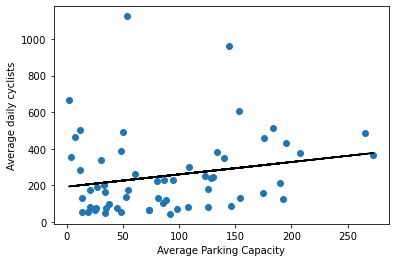

In [26]:
# Plot the graph with a regression line.

plt.scatter(X,y)

# Plot the line.
plt.plot(X,y_pred, color='black')
plt.xlabel("Average Parking Capacity")
plt.ylabel("Average daily cyclists")
plt.savefig('AverageCyclistsVsAverageParking.png')

In [27]:
central_parking = cycle_parking_year[cycle_parking_year['Functional cycling area'] == 'Central'] 

central_parking_cor = central_parking.corr()

central_parking_cor = round(central_parking_cor[['Average daily cycles']],2)

central_parking_cor = central_parking_cor.rename(columns = {'Average daily cycles' : 'Central daily cycles'})
central_parking_cor = central_parking_cor.reset_index()

In [28]:
inner_parking = cycle_parking_year[cycle_parking_year['Functional cycling area'] == 'Inner'] 

inner_parking_cor = inner_parking.corr()

inner_parking_cor = round(inner_parking_cor[['Average daily cycles']],2)

inner_parking_cor = inner_parking_cor.rename(columns = {'Average daily cycles' : 'Inner daily cycles'})
inner_parking_cor = inner_parking_cor.reset_index()

In [29]:
outer_parking = cycle_parking_year[cycle_parking_year['Functional cycling area'] == 'Outer'] 

outer_parking_cor = outer_parking.corr()

outer_parking_cor = round(outer_parking_cor[['Average daily cycles']],2)

outer_parking_cor = outer_parking_cor.rename(columns = {'Average daily cycles' : 'Outer daily cycles'})
outer_parking_cor = outer_parking_cor.reset_index()

In [30]:
daily_cycles_cor = daily_cycles_cor.rename(columns = {'Average daily cycles' : 'Overall average daily cycles'})
daily_cycles_cor = daily_cycles_cor.reset_index()

In [31]:
correlation = pd.merge(daily_cycles_cor, central_parking_cor, on=['index'])
correlation = pd.merge(correlation, inner_parking_cor, on=['index'])
correlation = pd.merge(correlation, outer_parking_cor, on=['index'])
correlation = correlation.rename(columns = {'index' : 'Parking type'})
correlation 

,Parking type,Overall average daily cycles,Central daily cycles,Inner daily cycles,Outer daily cycles
0,Carriageway,0.13,-0.43,0.24,0.19
1,Covered,-0.18,-0.40,-0.29,0.16
2,Secure,0.13,-0.53,0.15,0.34
3,Locker,0.15,-0.13,0.25,-0.02
4,Sheffield Stand,0.11,-0.26,0.08,0.26
5,"""M"" stand",0.11,-0.22,-0.11,-0.24
6,"""P"" stand",-0.06,-0.38,-0.21,-0.01
7,Cyclehoop,0.26,-0.36,0.36,0.29
8,Post,0.22,-0.36,0.29,0.27
9,Butterfly,0.08,-0.38,0.30,-0.12


In [32]:
area_count = cycle_parking_year[['Functional cycling area']]
area_count['Count'] = 1
area_count = area_count.groupby(['Functional cycling area'], as_index=False).sum()
area_count

C:\Users\jakee\AppData\Local\Temp/ipykernel_50608/2193096713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_count['Count'] = 1


,Functional cycling area,Count
0,Central,9
1,Inner,18
2,Outer,33


C:\Users\jakee\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.3519
Date:                Mon, 10 Oct 2022   Prob (F-statistic):              0.572
Time:                        17:03:45   Log-Likelihood:                -62.469
No. Observations:                   9   AIC:                             128.9
Df Residuals:                       7   BIC:                             129.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    659.8150    170.936      3.860      0.006     255.617    1064.013
X             -0.6623      1.116     -0.593      0.572      -3.302       1.978
==============================================================================
Omnibus:                        4.003   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                2.004
Skew:                           1.144   Prob(JB):                        0.367
Kurtosis:                       2.673   Cond. No.                         277.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

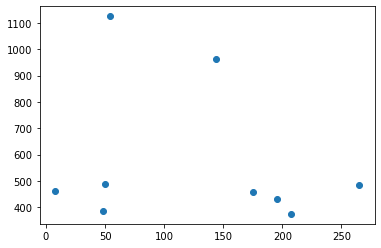

In [33]:
# Independent variable is set as number of tracks.
X = central_parking["Capacity"]

# Dependent variable is set as Average Cyclists.
y = central_parking["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = central_parking).fit()

# Prints the regression table
test.summary()

C:\Users\jakee\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                   0.03158
Date:                Mon, 10 Oct 2022   Prob (F-statistic):              0.861
Time:                        17:03:45   Log-Likelihood:                -117.99
No. Observations:                  18   AIC:                             240.0
Df Residuals:                      16   BIC:                             241.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    306.0753     66.275      4.618      0.000     165.579     446.571
X              0.0973      0.548      0.178      0.861      -1.064       1.258
==============================================================================
Omnibus:                        0.841   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.792
Skew:                           0.420   Prob(JB):                        0.673
Kurtosis:                       2.409   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

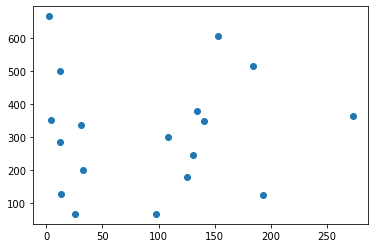

In [34]:
# Independent variable is set as number of tracks.
X = inner_parking["Capacity"]

# Dependent variable is set as Average Cyclists.
y = inner_parking["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = inner_parking).fit()

# Prints the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     4.397
Date:                Mon, 10 Oct 2022   Prob (F-statistic):             0.0443
Time:                        17:03:45   Log-Likelihood:                -183.85
No. Observations:                  33   AIC:                             371.7
Df Residuals:                      31   BIC:                             374.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.2143     21.334      4.229      0.000      46.703     133.725
X              0.5070      0.242      2.097      0.044       0.014       1.000
==============================================================================
Omnibus:                        4.618   Durbin-Watson:                   0.854
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                3.105
Skew:                           0.581   Prob(JB):                        0.212
Kurtosis:                       2.048   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

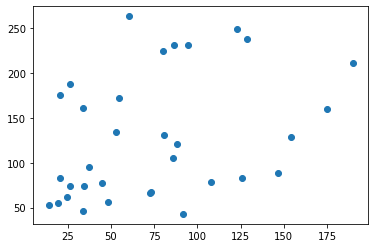

In [35]:
# Independent variable is set as number of tracks.
X = outer_parking["Capacity"]

# Dependent variable is set as Average Cyclists.
y = outer_parking["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = outer_parking).fit()

# Prints the regression table
test.summary()

In [36]:
parking['Parking type'] ='Total'

parking = parking.drop(['Borough', 'Survey Date', 'Survey Year', 'Capacity'], axis=1)

In [37]:
parking = parking.groupby(['Parking type'], as_index=True).sum()
parking

,Carriageway,Covered,Secure,Locker,Sheffield Stand,"""M"" stand","""P"" stand",Cyclehoop,Post,Butterfly,Wheel Rack,Bike Hangar,Two Tier,Other
Parking type,,,,,,,,,,,,,,
Total,772,1198,198,257,17544,844,118,2448,25,223,164,924,100,1177


In [38]:
bar_parking = parking.transpose()
bar_parking = bar_parking.reset_index().sort_values(by='Total', ascending=False)
bar_parking = bar_parking.rename(columns = {'Parking type' : 'index', 'index' : 'Parking type'})
bar_parking

Parking type,Parking type,Total
4,Sheffield Stand,17544
7,Cyclehoop,2448
1,Covered,1198
13,Other,1177
11,Bike Hangar,924
5,"""M"" stand",844
0,Carriageway,772
3,Locker,257
9,Butterfly,223
2,Secure,198


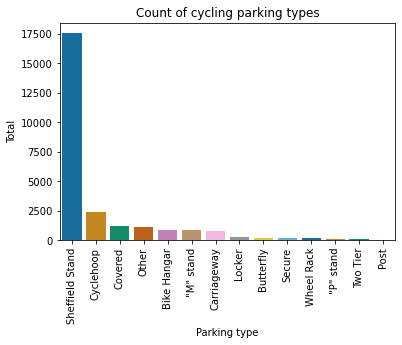

In [39]:
sns.barplot(x='Parking type', y='Total', data=bar_parking, palette='colorblind').set(title='Count of cycling parking types')
plt.xticks(rotation=90)
plt.savefig('ParkingTypeVolume.png', bbox_inches='tight', dpi=150)

In [40]:
bar_parking = bar_parking[bar_parking['Total'] > 500]
most_freq_parking_cor = pd.merge(bar_parking, correlation, on=['Parking type'])
                        
most_freq_parking_cor

,Parking type,Total,Overall average daily cycles,Central daily cycles,Inner daily cycles,Outer daily cycles
0,Sheffield Stand,17544,0.11,-0.26,0.08,0.26
1,Cyclehoop,2448,0.26,-0.36,0.36,0.29
2,Covered,1198,-0.18,-0.40,-0.29,0.16
3,Other,1177,-0.06,-0.31,0.12,0.13
4,Bike Hangar,924,0.08,-0.38,0.13,0.22
5,"""M"" stand",844,0.11,-0.22,-0.11,-0.24
6,Carriageway,772,0.13,-0.43,0.24,0.19
